In [2]:
!pip install streamlit tensorflow scikit-learn seaborn matplotlib



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Epoch 1/5


c:\Users\ESHA\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


168/168 ━━━━━━━━━━━━━━━━━━━━ 41s 213ms/step - accuracy: 0.8002 - loss: 0.5622 - val_accuracy: 0.8833 - val_loss: 0.3150
Epoch 2/5
168/168 ━━━━━━━━━━━━━━━━━━━━ 38s 228ms/step - accuracy: 0.9246 - loss: 0.2152 - val_accuracy: 0.9559 - val_loss: 0.1739
Epoch 3/5
168/168 ━━━━━━━━━━━━━━━━━━━━ 39s 231ms/step - accuracy: 0.9672 - loss: 0.1275 - val_accuracy: 0.9656 - val_loss: 0.1503
Epoch 4/5
168/168 ━━━━━━━━━━━━━━━━━━━━ 39s 232ms/step - accuracy: 0.9748 - loss: 0.0995 - val_accuracy: 0.9678 - val_loss: 0.1404
Epoch 5/5
168/168 ━━━━━━━━━━━━━━━━━━━━ 37s 222ms/step - accuracy: 0.9763 - loss: 0.0865 - val_accuracy: 0.9626 - val_loss: 0.1668
Epoch 1/5
168/168 ━━━━━━━━━━━━━━━━━━━━ 16s 74ms/step - accuracy: 0.7503 - loss: 0.7285 - val_accuracy: 0.7550 - val_loss: 0.7470
Epoch 2/5
168/168 ━━━━━━━━━━━━━━━━━━━━ 12s 72ms/step - accuracy: 0.7923 - loss: 0.5966 - val_accuracy: 0.8369 - val_loss: 0.5597
Epoch 3/5
168/168 ━━━━━━━━━━━━━━━━━━━━ 12s 73ms/step - accuracy: 0.8749 - loss: 0.3891 - val_accuracy:

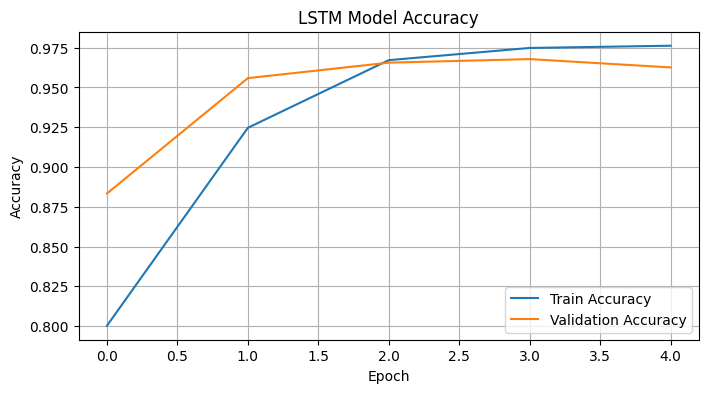

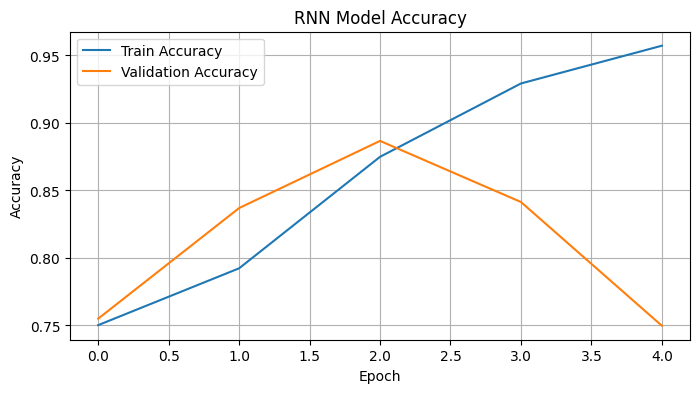

105/105 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step

LSTM Model Classification Report:

              precision    recall  f1-score   support

    Negative       0.93      0.91      0.92       506
     Neutral       0.97      1.00      0.98      2491
    Positive       0.94      0.78      0.86       346

    accuracy                           0.96      3343
   macro avg       0.95      0.89      0.92      3343
weighted avg       0.96      0.96      0.96      3343



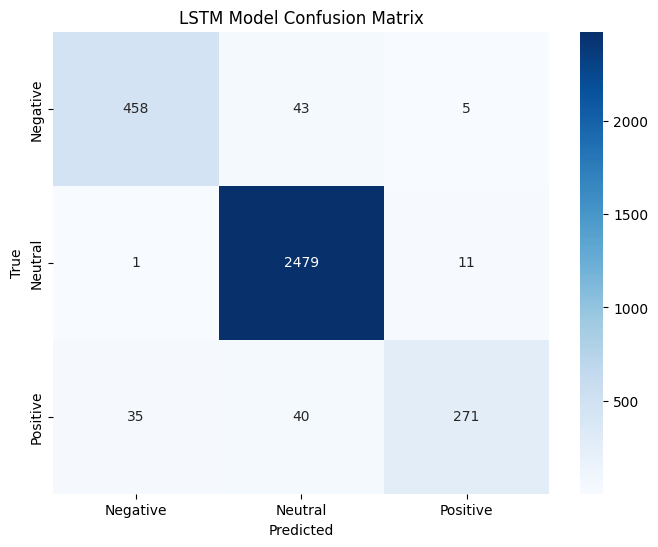

LSTM Model Accuracy: 0.9596
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step

RNN Model Classification Report:

              precision    recall  f1-score   support

    Negative       0.45      0.08      0.14       506
     Neutral       0.76      0.97      0.85      2491
    Positive       0.40      0.10      0.15       346

    accuracy                           0.74      3343
   macro avg       0.54      0.38      0.38      3343
weighted avg       0.68      0.74      0.67      3343



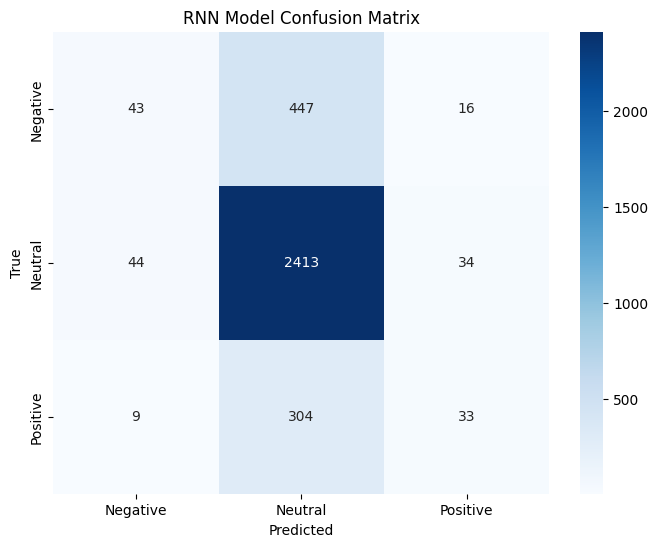

RNN Model Accuracy: 0.7445


In [3]:
# 1. Load Data
import pandas as pd
import re
import string
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, SimpleRNN, Dense
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv("swiggydataset.csv")

# 2. Clean and Label Data
positive_keywords = [
    'perfectly', 'tasty', 'highly', 'superb', 'favorite', 'amazing', 'delicious', 'best', 'absolutely',
    'great', 'excellent', 'awesome', 'fantastic', 'wonderful', 'yummy', 'satisfying', 'loved', 'fresh',
    'nice', 'quick', 'prompt', 'hot', 'on time', 'good', 'pleasant', 'flavorful', 'enjoyed'
]

negative_keywords = [
    'late', 'terrible', 'disappointed', 'worst', 'not worth', 'wouldn’t', 'cold', 'ruined',
    'bad', 'slow', 'rude', 'stale', 'awful', 'unpleasant', 'overcooked', 'underwhelming',
    'not good', 'delay', 'missing', 'poor', 'hard', 'burnt', 'bland', 'dirty'
]

def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|@\S+|#\S+', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def get_sentiment(review):
    review = review.lower()
    if any(kw in review for kw in positive_keywords):
        return 'Positive'
    elif any(kw in review for kw in negative_keywords):
        return 'Negative'
    else:
        return 'Neutral'

# Apply cleaning and labeling
df['Cleaned_Review'] = df['full_text'].apply(clean_text)
df['Review_Label'] = df['Cleaned_Review'].apply(get_sentiment)

# 3. Tokenization and Encoding
max_words = 5000
max_len = 100
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(df['Cleaned_Review'])
sequences = tokenizer.texts_to_sequences(df['Cleaned_Review'])
X_padded = pad_sequences(sequences, maxlen=max_len)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['Review_Label'])
y_categorical = to_categorical(y_encoded)

X_train, X_test, y_train, y_test = train_test_split(X_padded, y_categorical, test_size=0.2, random_state=42)

# 4. Define and Train LSTM Model
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
lstm_model.add(LSTM(128, return_sequences=True))
lstm_model.add(LSTM(64))
lstm_model.add(Dense(32, activation='relu'))
lstm_model.add(Dense(3, activation='softmax'))

lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

lstm_history = lstm_model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)

# 5. Define and Train RNN Model
rnn_model = Sequential()
rnn_model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
rnn_model.add(SimpleRNN(128, return_sequences=True))
rnn_model.add(SimpleRNN(64))
rnn_model.add(Dense(32, activation='relu'))
rnn_model.add(Dense(3, activation='softmax'))

rnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

rnn_history = rnn_model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)

# 6. Function to Plot Accuracy
def plot_validation_accuracy(history, model_name):
    plt.figure(figsize=(8, 4))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot Validation Accuracy
plot_validation_accuracy(lstm_history, "LSTM Model")
plot_validation_accuracy(rnn_history, "RNN Model")

# 7. Evaluation Function
def evaluate_model(model, name):
    y_pred = model.predict(X_test)
    y_pred_classes = y_pred.argmax(axis=1)
    y_test_true = y_test.argmax(axis=1)

    print(f"\n{name} Classification Report:\n")
    print(classification_report(y_test_true, y_pred_classes, target_names=label_encoder.classes_))

    cm = confusion_matrix(y_test_true, y_pred_classes)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    accuracy = accuracy_score(y_test_true, y_pred_classes)
    print(f"{name} Accuracy: {accuracy:.4f}")

# 8. Evaluate Both Models
evaluate_model(lstm_model, "LSTM Model")
evaluate_model(rnn_model, "RNN Model")

# 9. Interactive Prediction
def predict_sentiment(review, model):
    cleaned_review = clean_text(review)
    sequence = tokenizer.texts_to_sequences([cleaned_review])
    padded = pad_sequences(sequence, maxlen=max_len)
    prediction = model.predict(padded)
    predicted_class = prediction.argmax(axis=1)[0]
    label = label_encoder.inverse_transform([predicted_class])[0]
    return label


In [4]:
!pip install flask tensorflow scikit-learn matplotlib seaborn textblob


   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   --------------------------------------- 624.3/624.3 kB 12.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 30.0 MB/s eta 0:00:00

   ---------------------------------------- 0/2 [nltk]
   ---------------------------------------- 0/2 [nltk]
   ---------------------------------------- 0/2 [nltk]
   ---------------------------------------- 0/2 [nltk]
   ---------------------------------------- 0/2 [nltk]
   ---------------------------------------- 0/2 [nltk]
   ---------------------------------------- 0/2 [nltk]
   ---------------------------------------- 0/2 [nltk]
   ---------------------------------------- 0/2 [nltk]
   ---------------------------------------- 0/2 [nltk]
   ---------------------------------------- 0/2 [nltk]
   ---------------------------------------- 0/2 [nltk]
   ---------------------------------------


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
def predict_sentiment(review, model):
    cleaned_review = clean_text(review)
    seq = tokenizer.texts_to_sequences([cleaned_review])
    pad = pad_sequences(seq, maxlen=max_len)
    pred = model.predict(pad)
    label = label_encoder.inverse_transform([np.argmax(pred)])[0]
    confidence = np.max(pred)
    return label, confidence



print("\nEnter reviews to predict sentiment (type 'exit' to quit):\n")
while True:
    user_review = input("Your review: ")
    if user_review.lower() == 'exit':
        print("Exiting prediction loop.")
        break
    print("  ➤ LSTM Prediction:", predict_sentiment(user_review, lstm_model))
    print("  ➤ GRU Prediction: ", predict_sentiment(user_review, gru_model))



Enter reviews to predict sentiment (type 'exit' to quit):

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
  ➤ LSTM Prediction: ('Positive', np.float32(0.9998915))
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
  ➤ GRU Prediction:  ('Positive', np.float32(0.99995005))
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
  ➤ LSTM Prediction: ('Negative', np.float32(0.6909436))
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
  ➤ GRU Prediction:  ('Positive', np.float32(0.9999534))
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step
  ➤ LSTM Prediction: ('Neutral', np.float32(0.9982521))
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
  ➤ GRU Prediction:  ('Neutral', np.float32(0.99464947))
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
  ➤ LSTM Prediction: ('Negative', np.float32(0.998063))
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
  ➤ GRU Prediction:  ('Negative', np.float32(0.998896))
Exiting prediction loop.


In [15]:
import pickle
lstm_model.save("lstm_model.h5")
gru_model.save("gru_model.h5")

with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

with open("label_encoder.pkl", "wb") as f:
    pickle.dump(label_encoder, f)

print("🎯 All models and tools saved! Ready for Flask app.")


🎯 All models and tools saved! Ready for Flask app.
